In [1]:
import pandas as pd
import warnings
import scipy.stats as stats
import scipy
import math
import numpy as np
warnings.filterwarnings('ignore')

# Soal 2

### Membaca data dari file .csv

In [99]:
data = pd.read_csv('crime.csv',encoding = 'ISO-8859-1')

### Jumlah data Homicide

Homicide    165
Name: OFFENSE_CODE_GROUP, dtype: int64


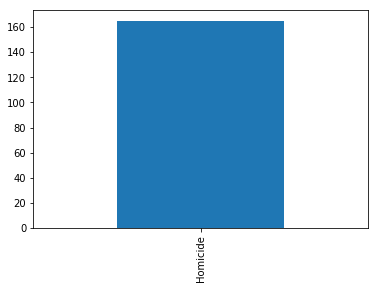

In [100]:
print(data["OFFENSE_CODE_GROUP"].value_counts()[['Homicide']])
data["OFFENSE_CODE_GROUP"].value_counts()[['Homicide']].plot.bar()

### Plot waktu kejahatan

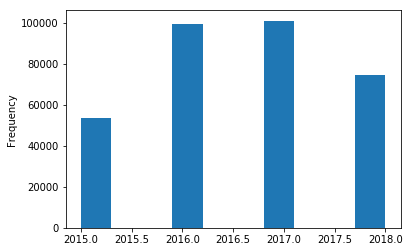

In [4]:
data["YEAR"].plot(kind = 'hist')

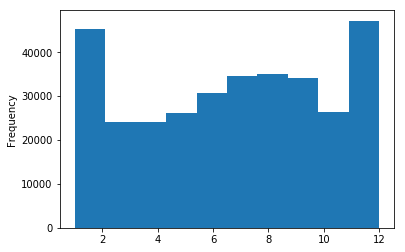

In [5]:
data["MONTH"].plot(kind = 'hist')

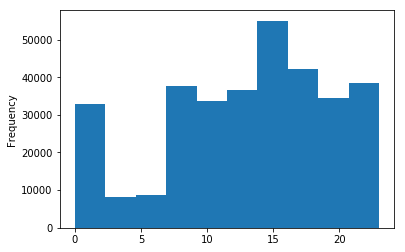

In [6]:
data["HOUR"].plot(kind = 'hist')

 ### Boxplot waktu kejahatan

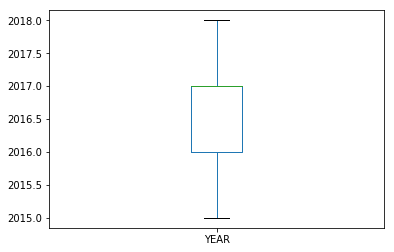

In [7]:
data["YEAR"].plot.box()

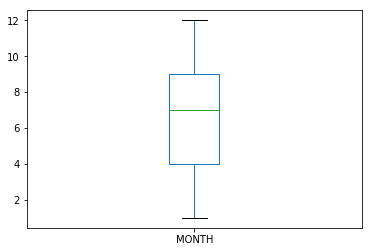

In [8]:
data["MONTH"].plot.box()

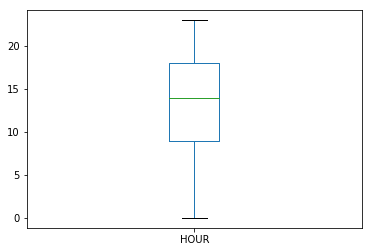

In [9]:
data["HOUR"].plot.box()

### Deskripsi statistik data

In [10]:
data.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

### Modus data

In [11]:
int(data["OFFENSE_CODE"].mode())
int(data["YEAR"].mode())
int(data["MONTH"].mode())
int(data["HOUR"].mode())

17

### Variansi data

In [12]:
data["YEAR"].var()
data["MONTH"].var()
data["HOUR"].var()

39.598252697848885

### Skewness data

In [13]:
data.skew()

OFFENSE_CODE    -0.410645
YEAR            -0.083805
MONTH           -0.119591
HOUR            -0.482938
Lat            -19.827352
Long            19.831624
dtype: float64

### Kurtosis data

In [14]:
data.kurt()

OFFENSE_CODE     -1.415226
YEAR             -1.090411
MONTH            -1.035742
HOUR             -0.600736
Lat             391.211516
Long            391.324226
dtype: float64

### Distribusi yang digunakan adalah distribusi binomial, dengan peluangnya adalah banyaknya data kejadian dibandingkan dengan banyaknya data total.

## Peluang Homicide

In [15]:
Pa = data[data.OFFENSE_CODE_GROUP == "Homicide"].INCIDENT_NUMBER.count() / data.INCIDENT_NUMBER.count()
Pa

0.0005033249954243183

In [16]:
round(1000*Pa)

1.0

## Peluang Homicide tanpa Shooting

In [17]:
Pb = (data[data.OFFENSE_CODE_GROUP == "Homicide"].INCIDENT_NUMBER.count() - data[data.OFFENSE_CODE_GROUP == "Homicide"].SHOOTING.count()) / data.INCIDENT_NUMBER.count()
Pb

0.0001281190897443719

In [18]:
round(1000*Pb)

0.0

## Peluang terjadi jam 20.00 dan di hari Sabtu

In [19]:
Pc = data[data.HOUR == 20][data.DAY_OF_WEEK == 'Saturday'].INCIDENT_NUMBER.count() / data.INCIDENT_NUMBER.count()
Pc

0.006683545848331402

In [20]:
round(1000*Pc)

7.0

## Geneva Ave atau Prescott Street

In [21]:
Pa2 = data[data.STREET == 'GENEVA AVE'].append(data[data.STREET == 'PRESCOTT ST']).INCIDENT_NUMBER.count() / data.INCIDENT_NUMBER.count()
Pa2

0.005609785858092856

In [22]:
round(2000*Pa2)

11.0

## Dilaporkan di Kantor Polisi Nomor 495 dan District E18

In [23]:
Pb2 = data[data.REPORTING_AREA == '495'][data.DISTRICT == 'E18'].INCIDENT_NUMBER.count() / data.INCIDENT_NUMBER.count()
Pb2

0.0015099749862729547

In [24]:
round(2000*Pb2)

3.0

## Tidak terjadi pada saat hari libur (asumsi hari libur adalah Sabtu dan Minggu)

In [25]:
Pc2 = data[data.DAY_OF_WEEK != 'Saturday'][data.DAY_OF_WEEK != 'Sunday'].INCIDENT_NUMBER.count() / data.INCIDENT_NUMBER.count()
Pc2

0.7335641510585077

In [26]:
2000*Pc2

1467.1283021170154

# Soal 3

### Membaca data dari file .csv

In [27]:
data = pd.read_csv('black_friday.csv', header = None)

### Mengubah nama kolom dari data

In [28]:
data = data.rename(index = str, columns = {0: "Spending"})

### Plot dan boxplot data

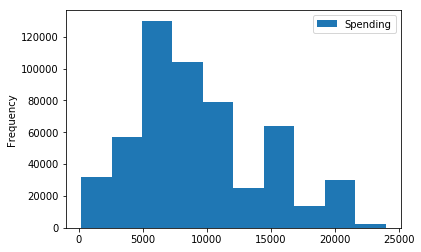

In [29]:
data.plot(kind = 'hist')

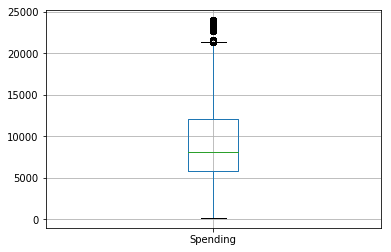

In [30]:
data.boxplot()

### Deskripsi statistik data

In [31]:
data.describe()

Spending
count  537577.000000
mean     9333.859853
std      4981.022133
min       185.000000
25%      5866.000000
50%      8062.000000
75%     12073.000000
max     23961.000000

### Modus data

In [32]:
int(data.Spending.mode())

6855

### Variansi data

In [33]:
data.Spending.var()

24810581.486013696

### Skewness data

In [34]:
data.Spending.skew()

0.6242797316083074

### Kurtosis data

In [35]:
data.Spending.kurt()

-0.34312137256836284

### Distribusi yang digunakan adalah distribusi binomial, dengan peluangnya adalah banyaknya data kejadian dibandingkan dengan banyaknya data total.

## Miskin (<$1000)

In [36]:
Pa = data[data.Spending < 1000].Spending.count() / data.Spending.count()
Pa

0.013103239163877919

In [37]:
round(250*Pa)

3.0

## Kaya (>$10000)

In [38]:
Pb = data[data.Spending > 10000].Spending.count() / data.Spending.count()
Pb

0.3472190960550768

In [39]:
round(250*Pb)

87.0

## Crazy Rich (>$20000)

In [40]:
Pc = data[data.Spending > 20000].Spending.count() / data.Spending.count()
Pc

0.023280385879604223

In [41]:
round(250*Pc)

6.0

# Galaxy Ford (1980-2000 dollar inklusif)

In [42]:
Pa2 = data[data.Spending <= 2000][data.Spending >= 1980].Spending.count() / data.Spending.count()
Pa2

0.0012351718916545908

In [43]:
round(1000*Pa2)

1.0

## MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (2707–2897 dollar inklusif)

In [44]:
Pb2 = data[data.Spending <= 2897][data.Spending >= 2707].Spending.count() / data.Spending.count()
Pb2

0.007174786123662284

In [45]:
round(1000*Pb2)

7.0

# Soal 5

### Membaca data dari file .csv

In [46]:
data = pd.read_csv('athletes.csv')

### Plot dan boxplot data

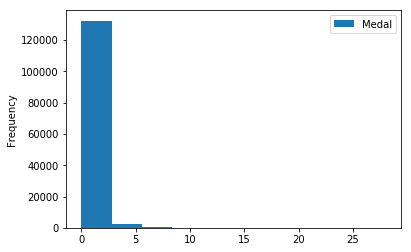

In [47]:
data.plot(kind = 'hist')

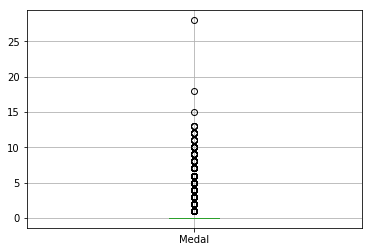

In [48]:
data.boxplot()

## Deskripsi statistik data

In [49]:
data.describe()

Medal
count  134731.000000
mean        0.295277
std         0.724716
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        28.000000

### Modus data

In [50]:
int(data.Medal.mode())

0

### Variansi data

In [51]:
data.Medal.var()

0.5252132778007574

### Skewness data

In [52]:
data.Medal.skew()

4.8199987845312

### Kurtosis data

In [53]:
data.Medal.kurt()

51.562525836059855

## Membandingkan data pada soal dengan distribusi gamma

### Mencari beta

In [54]:
beta = data.Medal.var()/data.Medal.mean()
beta

1.7787122673346367

### Mencari alpha

In [55]:
alpha = data.Medal.mean()/beta
alpha

0.1660061953723104

### Menampung data-data yang diamati dan dan ekspektasi data

In [56]:
observed = []
expected = []

for a in data.Medal.unique():
    observed.append(data[data.Medal == a].Medal.count()/data.Medal.count())
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ,15, 18, 28]
for num in nums: 
    expected.append((math.exp(-num/beta))*((num**(alpha-1)) if (num!=0) else 1)/(5.58991)*(beta**alpha))

### Menghitung critical value

In [57]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 16)   # *

print("Critical value")
print(crit)

Critical value
26.29622760486423


### Menghitung chi-square

In [58]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=1.8442523546977627, pvalue=0.9999942623901568)

### Data memenuhi distribusi gamma, karena total chi-square (1.884) lebih kecil daripada nilai critical (26.296)

## Untuk kasus 0 medali, distribusi yang digunakan adalah distribusi binomial, karena data bersifat diskrit dan nilai alpha < 1

### Peluang meraih tepat 0 medali

In [59]:
Pa1 = data[data.Medal == 0].Medal.count()/data.Medal.count()
Pa1

0.7906792052311643

### Peluang meraih lebih dari 10 medali

In [60]:
Pa2 = scipy.special.gammaincc(alpha, 10/beta)
Pa2

0.00013567865846139635

### Peluang meraih tepat 3 medali

In [61]:
Pa3 = (math.exp(-3/beta))*(3**(alpha-1))/(5.58991)*(beta**alpha)
Pa3

0.014578445024324352

### Peluang meraih 1 atau 5 medali

In [62]:
Pa4 = (math.exp(-1/beta))*(1**(alpha-1))/(5.58991)*(beta**alpha) + (math.exp(-5/beta))*(5**(alpha-1))/(5.58991)*(beta**alpha)
Pa4

0.11528234113938639

# Rata-rata medali yang didapat

Rata-rata medali yang didapat ada di antara dua nilai berikut

In [63]:
data.Medal.mean() - stats.norm.ppf(q = 0.95)*data.Medal.std()/math.sqrt(data.Medal.count()) #min

0.29202966509172773

In [64]:
data.Medal.mean() + stats.norm.ppf(q = 0.95)*data.Medal.std()/math.sqrt(data.Medal.count()) #max

0.29852484723283007

# Soal 6

### Membaca data dari file .csv

In [65]:
data = pd.read_csv('greenhouse-gas-emissions-in-the-netherlands/emission.csv')

### Plot data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022527411780>,
      dtype=object)

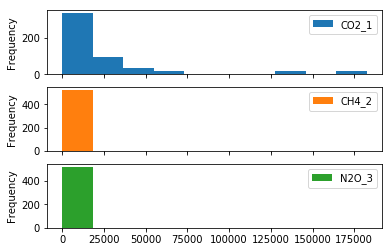

In [66]:
data.drop(columns=["ID"]).plot(kind = 'hist', subplots = True)

### Boxplot data

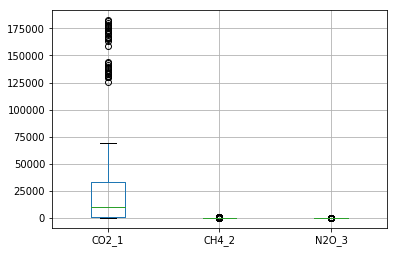

In [67]:
data.drop(columns=["ID"]).boxplot()

### Deskripsi statistik data

In [68]:
data.drop(columns=["ID"]).describe()

CO2_1        CH4_2       N2O_3
count     520.000000   520.000000  520.000000
mean    25673.019231   129.603038    5.987808
std     40799.113750   276.269489   12.383163
min        30.000000     0.000000    0.000000
25%      1165.000000     0.120000    0.020000
50%     10065.000000     2.775000    0.145000
75%     33080.000000    21.495000    1.035000
max    182440.000000  1278.170000   59.840000

### Modus data CO2

In [69]:
data.CO2_1.mode()

0    40
dtype: int64

### Modus data CH4

In [70]:
data.CH4_2.mode()

0    0.0
dtype: float64

### Modus data N2O

In [71]:
data.N2O_3.mode()

0    0.03
dtype: float64

### Variansi data

In [72]:
data.drop(columns = ["ID"]).var()

CO2_1    1.664568e+09
CH4_2    7.632483e+04
N2O_3    1.533427e+02
dtype: float64

### Skewness data

In [73]:
data.drop(columns = ["ID"]).skew()

CO2_1    2.478482
CH4_2    2.121462
N2O_3    2.261290
dtype: float64

### Kurtosis data

In [74]:
data.drop(columns = ["ID"]).kurt()

CO2_1    5.597452
CH4_2    3.285010
N2O_3    4.607188
dtype: float64

## Fungsi untuk menentukan distribusi terbaik

In [75]:
def best_fit_distribution(data, bins=200):
    y,x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    DISTRIBUTIONS = [        
          stats.beta,stats.chi,stats.chi2,stats.expon,stats.gamma,stats.halfnorm,stats.norm,stats.t
    ]

    # Best holders
    best_distribution = stats.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:
        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)
                
                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

dat = pd.read_csv('greenhouse-gas-emissions-in-the-netherlands/emission.csv',  header = None, skiprows = 1)
dat1 = dat[3].values
best_fit_name, best_fit_params = best_fit_distribution(dat1, 200)
best_dist = getattr(stats, best_fit_name)
print("Distribusi CO2")
print(best_fit_name)
dat2 = dat[4].values
best_fit_name, best_fit_params = best_fit_distribution(dat2, 200)
best_dist = getattr(stats, best_fit_name)
print("Distribusi CH4")
print(best_fit_name)
dat3 = dat[5].values
best_fit_name, best_fit_params = best_fit_distribution(dat3, 200)
best_dist = getattr(stats, best_fit_name)
print("Distribusi N2O")
print(best_fit_name)


Distribusi CO2
gamma
Distribusi CH4
gamma
Distribusi N2O
gamma


### Mencari mean CO2 untuk sektor T001176

In [76]:
betaCO2 = data[data.Bronnen == "T001176"].CO2_1.var() / data[data.Bronnen == "T001176"].CO2_1.mean()
betaCO2

244.79507659434222

### Mencari mean CH4 untuk sektor T001176

In [77]:
betaCH4 = data[data.Bronnen == "T001176"].CH4_2.var() / data[data.Bronnen == "T001176"].CH4_2.mean()
betaCH4

27.159371956178603

### Mencari mean N2O untuk sektor T001176

In [78]:
betaN2O = data[data.Bronnen == "T001176"].N2O_3.var() / data[data.Bronnen == "T001176"].N2O_3.mean()
betaN2O

3.743454963861764

### Mencari alpha CO2 untuk sektor T001176

In [79]:
alphaCO2 = data[data.Bronnen == "T001176"].CO2_1.mean() / betaCO2
alphaCO2

701.9258818049748

### Mencari alpha CH4 untuk sektor T001176

In [80]:
alphaCH4 = data[data.Bronnen == "T001176"].CH4_2.mean() / betaCH4
alphaCH4

31.20230472808166

### Mencari alpha N2O untuk sektor T001176

In [81]:
alphaN2O = data[data.Bronnen == "T001176"].N2O_3.mean() / betaN2O
alphaN2O

10.416847638464064

## Ekspektasi total dari sektor T001176

In [82]:
scipy.special.gammaincc(alphaCO2, 12000/betaCO2)*scipy.special.gammaincc(alphaCH4, 600/betaCH4)*scipy.special.gammaincc(alphaN2O, 25/betaN2O)

0.8557396044041358

### Menghitung mean CO2 untuk sektor 305800

In [83]:
betaCO2 = data[data.Bronnen == "305800"].CO2_1.var() / data[data.Bronnen == "305800"].CO2_1.mean()
betaCO2

7.525335985142072

### Menghitung mean CH4 untuk sektor 305800

In [84]:
betaCH4 = data[data.Bronnen == "305800"].CH4_2.var() / data[data.Bronnen == "305800"].CH4_2.mean()
betaCH4

9.482492540032382

### Menghitung mean N2O untuk sektor 305800

In [85]:
betaN2O = data[data.Bronnen == "305800"].N2O_3.var() / data[data.Bronnen == "305800"].N2O_3.mean()
betaN2O

0.01407894736842105

### Menghitung alpha CO2 untuk sektor 305800

In [86]:
alphaCO2 = data[data.Bronnen == "305800"].CO2_1.mean() / betaCO2
alphaCO2

239.12553586350296

### Menghitung alpha CH4 untuk sektor 305800

In [87]:
alphaCH4 = data[data.Bronnen == "305800"].CH4_2.mean() / betaCH4
alphaCH4

2.163249790432205

### Menghitung alpha N2O untuk sektor 305800

In [88]:
alphaN2O = data[data.Bronnen == "305800"].N2O_3.mean() / betaN2O
alphaN2O

1.1364485981308416

## Ekspektasi emisi gas dari sektor 305800 untuk rata-rata semua emisi gas tidak melebihi 1500.

In [89]:
scipy.special.gammainc(alphaCO2, 1500/betaCO2)*scipy.special.gammainc(alphaCH4, 1500/betaCH4)*scipy.special.gammainc(alphaN2O, 1500/betaN2O)

0.0033609957455896945

### Menghitung mean CO2 untuk sektor 346700

In [90]:
betaCO2 = data[data.Bronnen == "346700"].CO2_1.var() / data[data.Bronnen == "346700"].CO2_1.mean()
betaCO2

266.0670330964377

### Menghitung mean CH4 untuk sektor 346700

In [91]:
betaCH4 = data[data.Bronnen == "346700"].CH4_2.var() / data[data.Bronnen == "346700"].CH4_2.mean()
betaCH4

0.3001174482980418

### Menghitung mean N2O untuk sektor 346700

In [92]:
betaN2O = data[data.Bronnen == "346700"].N2O_3.var() / data[data.Bronnen == "346700"].N2O_3.mean()
betaN2O

0.00393623256359161

### Menghitung alpha CO2 untuk sektor 346700

In [93]:
alphaCO2 = data[data.Bronnen == "346700"].CO2_1.mean() / betaCO2
alphaCO2

186.46052997485856

### Menghitung alpha CH4 untuk sektor 346700

In [94]:
alphaCH4 = data[data.Bronnen == "346700"].CH4_2.mean() / betaCH4
alphaCH4

63.526796286320405

### Menghitung alpha N2O untuk sektor 346700

In [95]:
alphaN2O = data[data.Bronnen == "346700"].N2O_3.mean() / betaN2O
alphaN2O

114.06846337105411

## Ekspektasi emisi sektor perusahaan energi untuk rata-rata emisi tidak melebihi 35000.

In [96]:
scipy.special.gammainc(alphaCO2, 35000/betaCO2)*scipy.special.gammainc(alphaCH4, 35000/betaCH4)*scipy.special.gammainc(alphaN2O, 35000/betaN2O)

3.7834468418226922e-06

# Rata-rata CO2

Rata-rata CO2 ada di antara dua nilai berikut

In [97]:
data.CO2_1.mean() - stats.norm.ppf(q = 0.95)*data.CO2_1.std()/math.sqrt(data.CO2_1.count()) #min

22730.113746640265

In [98]:
data.CO2_1.mean() + stats.norm.ppf(q = 0.95)*data.CO2_1.std()/math.sqrt(data.CO2_1.count()) #max

28615.924714898196